In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install Bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Line style syntax importation.
%matplotlib inline

# Structuring the code.
import math, datetime, time, random

# Accessing, extracting, manipulating and modifying your observations.
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use("seaborn-whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing train and test data.

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

\# 1. Age Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [ ]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
train.Age.dtypes

dtype('float64')

In [ ]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.rcParams.update({'font.size': 15})

Text(0.5, 1.0, 'Evaluations of Age Distributions')

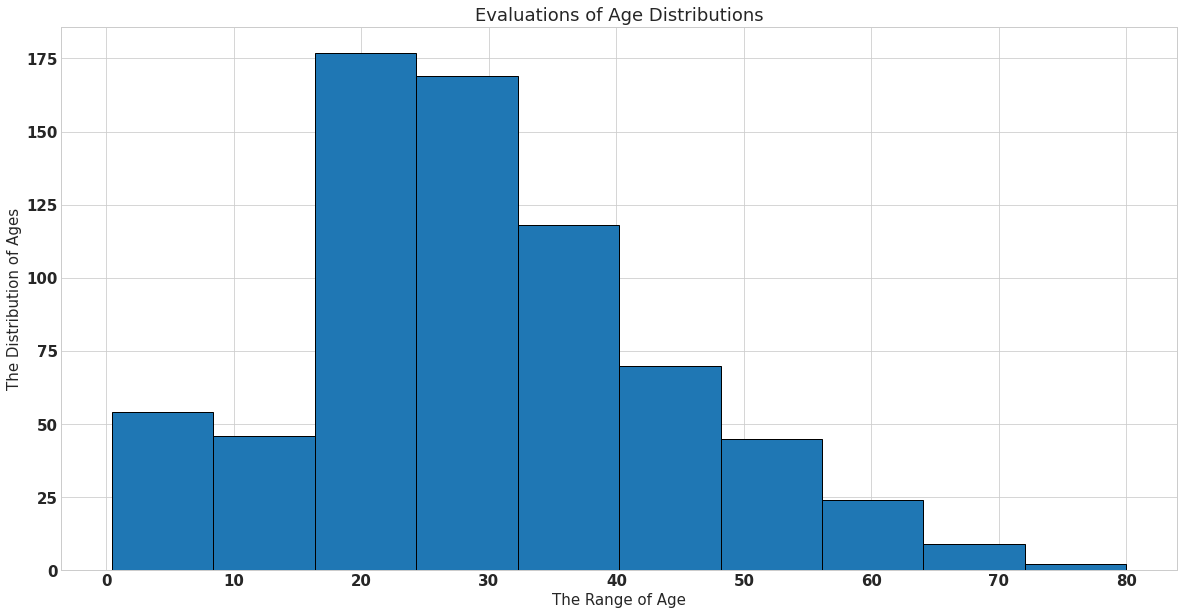

In [ ]:
train.Age.plot.hist(edgecolor = "black", figsize=(20,10))
plt.xlabel('The Range of Age')
plt.ylabel('The Distribution of Ages')
plt.title('Evaluations of Age Distributions')

Text(0.5, 1.0, 'Evaluations of Age Distributions')

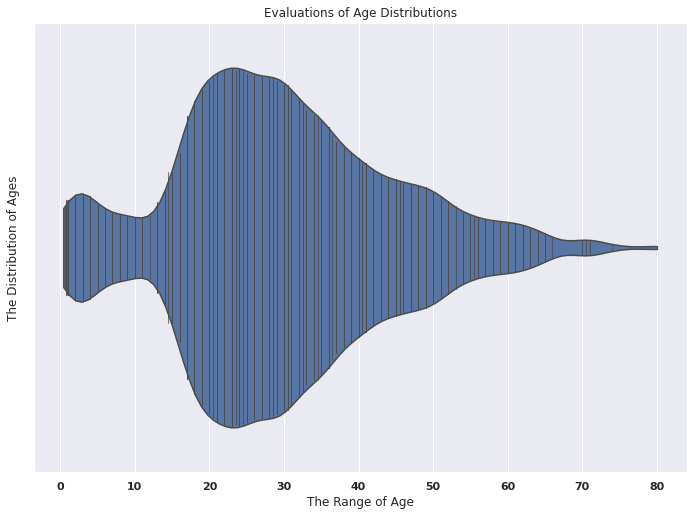

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x="Age", data=train, cut = 0, bw = .15, inner="stick", scale = "count")
plt.xlabel('The Range of Age')
plt.ylabel('The Distribution of Ages')
plt.title('Evaluations of Age Distributions')

In [ ]:
train.Age.max()

80.0

Text(0.5, 1.0, 'Evaluations of Age Distributions')

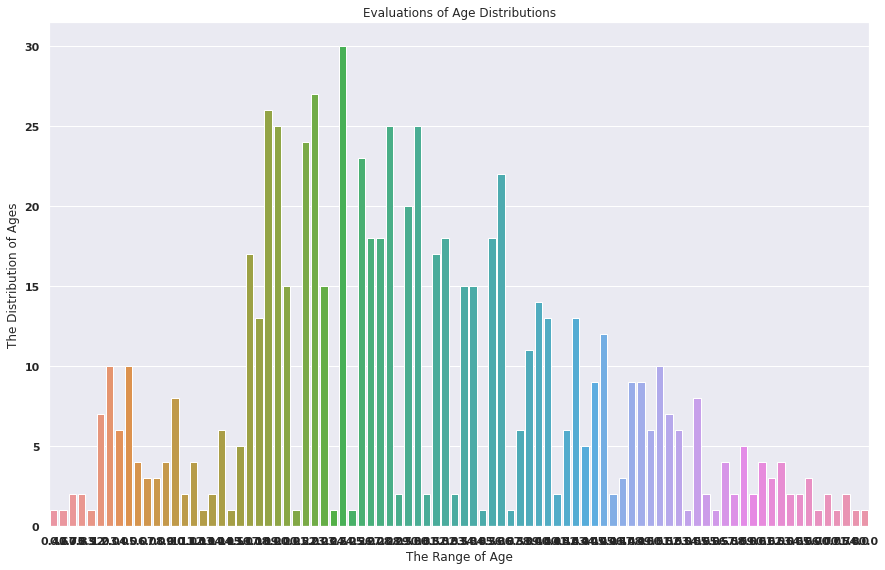

In [ ]:
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.countplot(x="Age", data=train)
plt.xlabel('The Range of Age')
plt.ylabel('The Distribution of Ages')
plt.title('Evaluations of Age Distributions')

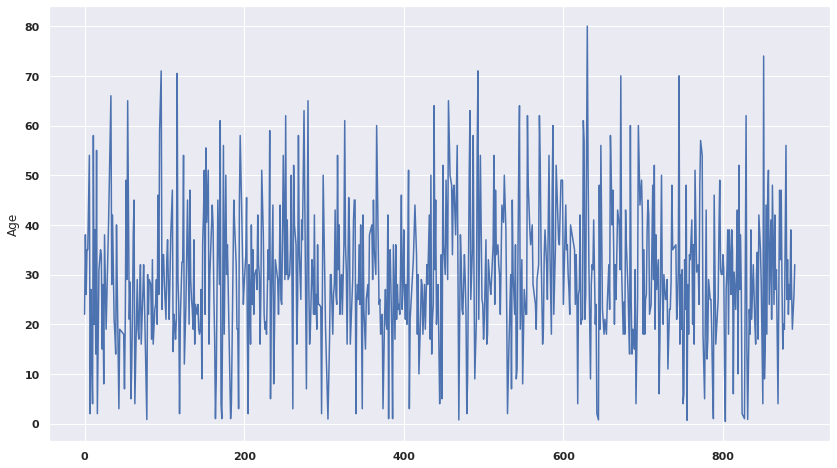

In [ ]:
sns.set_style('dark')
sns.set(rc={'figure.figsize':(14,8)})
sns.lineplot(data = train.Age)
plt.show()

In [ ]:
AgeBins = pd.cut(train["Age"], 10)
AgeBins

0      (16.336, 24.294]
1       (32.252, 40.21]
2      (24.294, 32.252]
3       (32.252, 40.21]
4       (32.252, 40.21]
             ...       
886    (24.294, 32.252]
887    (16.336, 24.294]
888                 NaN
889    (24.294, 32.252]
890    (24.294, 32.252]
Name: Age, Length: 891, dtype: category
Categories (10, interval[float64, right]): [(0.34, 8.378] < (8.378, 16.336] < (16.336, 24.294] <
                                            (24.294, 32.252] ... (48.168, 56.126] <
                                            (56.126, 64.084] < (64.084, 72.042] < (72.042, 80.0]]

In [ ]:
train["AgeBins"] = AgeBins
train.AgeBins

0      (16.336, 24.294]
1       (32.252, 40.21]
2      (24.294, 32.252]
3       (32.252, 40.21]
4       (32.252, 40.21]
             ...       
886    (24.294, 32.252]
887    (16.336, 24.294]
888                 NaN
889    (24.294, 32.252]
890    (24.294, 32.252]
Name: AgeBins, Length: 891, dtype: category
Categories (10, interval[float64, right]): [(0.34, 8.378] < (8.378, 16.336] < (16.336, 24.294] <
                                            (24.294, 32.252] ... (48.168, 56.126] <
                                            (56.126, 64.084] < (64.084, 72.042] < (72.042, 80.0]]

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 24.294]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24.294, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.252, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 40.21]"


In [ ]:
"""
train.AgeBins.plt.boxplot()

Fix this problem later.

Q: plot range of values python

plt.plot([1000, 2000], [5, 5], lw=10, color="orange", solid_capstyle="butt")#Setting capstyle to butt, because otherwise the length of the line is slightly longer, than required
plt.yticks(range(10))
plt.xticks(range(500, 3000, 500))
plt.margins(0.5)
plt.show()

"""

'\ntrain.AgeBins.plt.boxplot()\n\nFix this problem later.\n\nQ: plot range of values python\n\nplt.plot([1000, 2000], [5, 5], lw=10, color="orange", solid_capstyle="butt")#Setting capstyle to butt, because otherwise the length of the line is slightly longer, than required\nplt.yticks(range(10))\nplt.xticks(range(500, 3000, 500))\nplt.margins(0.5)\nplt.show()\n\n'

In [ ]:
train.Age = train.Age.fillna(train.Age.mean())

In [ ]:
"""
# Converts the null data into boolean (in string form) values.



updated_train = train
updated_train["Age"] = updated_train["Age"].isnull()
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = "mean") #It can be any statistical parameter.
my_imputer.fit_transform(train.isnull())

"""

'\n# Converts the null data into boolean (in string form) values.\n\n\n\nupdated_train = train\nupdated_train["Age"] = updated_train["Age"].isnull()\nfrom sklearn.impute import SimpleImputer\nmy_imputer = SimpleImputer(strategy = "mean") #It can be any statistical parameter.\nmy_imputer.fit_transform(train.isnull())\n\n'

In [ ]:
"""
# Converts the null data into boolean (in string form) values.


updated_train = train
updated_train["AgeBins"] = updated_train["AgeBins"].isnull()
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = "median") #It can be any statistical parameter.
my_imputer.fit_transform(train.isnull())
"""

'\n# Converts the null data into boolean (in string form) values.\n\n\nupdated_train = train\nupdated_train["AgeBins"] = updated_train["AgeBins"].isnull()\nfrom sklearn.impute import SimpleImputer\nmy_imputer = SimpleImputer(strategy = "median") #It can be any statistical parameter.\nmy_imputer.fit_transform(train.isnull())\n'

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeBins        177
dtype: int64

In [ ]:
train.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 24.294]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24.294, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.252, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 40.21]"


In [ ]:
train.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [ ]:
train.Age.nunique()

89

In [ ]:
train.Age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [ ]:
train["Age"] = train["Age"].astype(int)

In [ ]:
train["Age"].unique()

array([22, 38, 26, 35, 29, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [ ]:
train["Age"].value_counts()

29    197
24     31
22     27
28     27
30     27
     ... 
66      1
53      1
80      1
12      1
74      1
Name: Age, Length: 71, dtype: int64

In [ ]:
np.sort(train["Age"])

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 11, 11, 11, 11,
       12, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22

In [ ]:
train.Age.describe()

count    891.000000
mean      29.544332
std       13.013778
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Evaluations of Age Distributions')

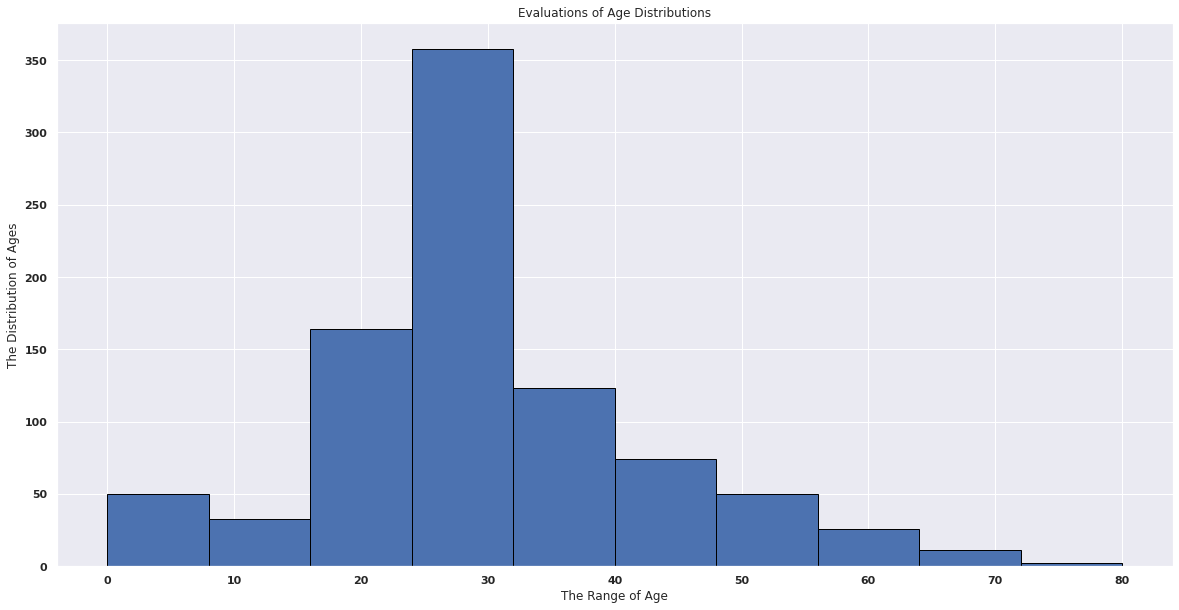

In [ ]:
train.Age.plot.hist(edgecolor = "black", figsize=(20,10))
plt.xlabel('The Range of Age')
plt.ylabel('The Distribution of Ages')
plt.title('Evaluations of Age Distributions')

In [ ]:
train["Age"]

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [ ]:
#Frequency distribution of Ages.
ClassIntervals = ["0-20", "21-40", "41- 60", "61-80"]

FreqAge = pd.DataFrame(train["Age"], columns = ["Age"])
FreqAge.index.name = 'Frequency'
FreqAge

,Age
Frequency,
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118


In [ ]:
FreqAge.value_counts()

Age      
29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
20.500000      1
14.500000      1
12.000000      1
0.920000       1
80.000000      1
Length: 89, dtype: int64

In [ ]:
FreqAge.value_counts(sort = False)

Age  
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Length: 89, dtype: int64

In [ ]:
freq_table = pd.crosstab(index = "Frequency", columns = FreqAge["Age"])
freq_table

freq_table = (freq_table / len(train.Age)) * 100
freq_table

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
row_0,,,,,,,,,,,,,,,,,,,,,
Frequency,0.112233,0.112233,0.224467,0.224467,0.112233,0.785634,1.122334,0.673401,1.122334,0.448934,...,0.448934,0.224467,0.224467,0.3367,0.112233,0.224467,0.112233,0.224467,0.112233,0.112233


In [ ]:
FreqAge["Classes"] = pd.cut(FreqAge.Age, bins = 5)
FreqAge

,Age,Classes
Frequency,,
0,22.000000,"(16.336, 32.252]"
1,38.000000,"(32.252, 48.168]"
2,26.000000,"(16.336, 32.252]"
3,35.000000,"(32.252, 48.168]"
4,35.000000,"(32.252, 48.168]"
...,...,...
886,27.000000,"(16.336, 32.252]"
887,19.000000,"(16.336, 32.252]"
888,29.699118,"(16.336, 32.252]"


In [ ]:
freq_table = pd.crosstab(index = "NoOfObservations", columns = FreqAge["Classes"])
freq_table

Classes,"(0.34, 16.336]","(16.336, 32.252]","(32.252, 48.168]","(48.168, 64.084]","(64.084, 80.0]"
row_0,,,,,
NoOfObservations,100,523,188,69,11


In [ ]:
freq_table

Classes,"(0.34, 16.336]","(16.336, 32.252]","(32.252, 48.168]","(48.168, 64.084]","(64.084, 80.0]"
row_0,,,,,
NoOfObservations,100,523,188,69,11


In [ ]:
df = FQtable.to_frame()
df

,0
Classes,
"(0.34, 16.336]",100
"(16.336, 32.252]",523
"(32.252, 48.168]",188
"(48.168, 64.084]",69
"(64.084, 80.0]",11


In [ ]:
df.shape

(5, 1)

In [ ]:
df1 = df.rename(columns = {0: "Frequencies"})
df1

,Frequencies
Classes,
"(0.34, 16.336]",100
"(16.336, 32.252]",523
"(32.252, 48.168]",188
"(48.168, 64.084]",69
"(64.084, 80.0]",11


In [ ]:
df1["RelativeFrequencies"] = df1["Frequencies"] / df1["Frequencies"].sum() * 100
df1

,Frequencies,RelativeFrequencies
Classes,,
"(0.34, 16.336]",100,11.223345
"(16.336, 32.252]",523,58.698092
"(32.252, 48.168]",188,21.099888
"(48.168, 64.084]",69,7.744108
"(64.084, 80.0]",11,1.234568


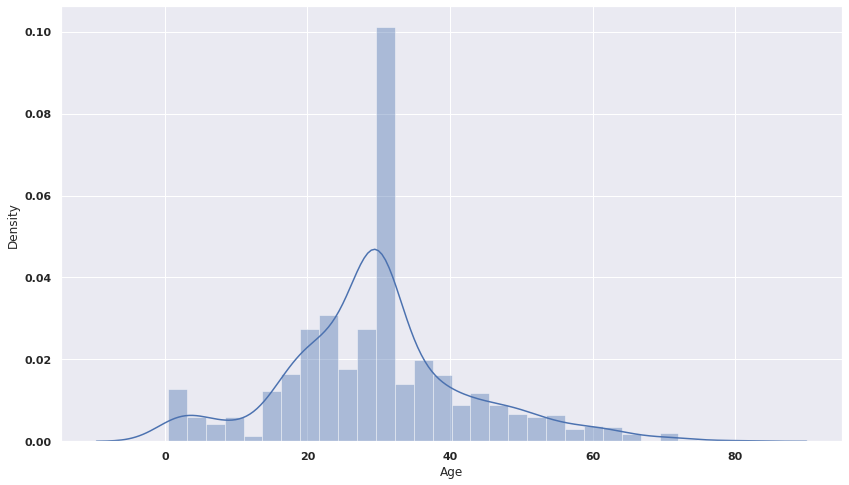

In [ ]:
sns.distplot(train.Age)